In [ ]:
folder = "VirtualValtteri"
filename = "VirtualValtteri.vmkarting.2023-03-14-10-22-51.csv"
sensors = {
    'rotation': 'android.sensor.rotation_vector',
    'acceleration': 'android.sensor.linear_acceleration',
    'magnetic': 'android.sensor.magnetic_field'
}



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
fullpath = '/content/drive/MyDrive/' + folder +"/"+ filename
names=['timestamp','type','sensortype','vendor','version','x','y','z','zz','str1','str2','str3','str4','str5','str6']
alldata = pd.read_csv(fullpath,names=names)
alldata.head(10)

Mounted at /content/drive


timestamp  type                          sensortype    vendor  \
0  513284284786947    10  android.sensor.linear_acceleration  qualcomm   
1  513284289775280    10  android.sensor.linear_acceleration  qualcomm   
2  513284294763614    10  android.sensor.linear_acceleration  qualcomm   
3  513284299751947    10  android.sensor.linear_acceleration  qualcomm   
4  513284304740280    10  android.sensor.linear_acceleration  qualcomm   
5  513284309728614    10  android.sensor.linear_acceleration  qualcomm   
6  513284314722624    10  android.sensor.linear_acceleration  qualcomm   
7  513284299592833     2       android.sensor.magnetic_field    memsic   
8  513284309592833     2       android.sensor.magnetic_field    memsic   
9  513284289775280    11      android.sensor.rotation_vector  qualcomm   

    version         x         y          z       zz  str1  str2  str3  str4  \
0         1  0.000000  0.000000   0.000000      NaN   NaN   NaN   NaN   NaN   
1         1  0.002167 -0.003965   0.020579      NaN   NaN   NaN   NaN   NaN   
2         1 -0.014511 -0.015482   0.072820      NaN   NaN   NaN   NaN   NaN   
3         1 -0.016011 -0.011334   0.111910      NaN   NaN   NaN   NaN   NaN   
4         1 -0.016187 -0.002816   0.148603      NaN   NaN   NaN   NaN   NaN   
5         1 -0.010955 -0.015822   0.169437      NaN   NaN   NaN   NaN   NaN   
6         1  0.019829 -0.021304   0.177794      NaN   NaN   NaN   NaN   NaN   
7  20520568 -4.404200  4.135800 -26.120200      NaN   NaN   NaN   NaN   NaN   
8  20520568 -4.843400  3.989400 -26.217800      NaN   NaN   NaN   NaN   NaN   
9         1  0.145319 -0.233890  -0.835374  0.47574  -1.0   NaN   NaN   NaN   

   str5  str6  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN  
5   NaN   NaN  
6   NaN   NaN  
7   NaN   NaN  
8   NaN   NaN  
9   NaN   NaN

In [ ]:
acceleration=alldata.loc[alldata['sensortype']==sensors['acceleration']]
rotation=alldata.loc[alldata['sensortype']==sensors['rotation']]
velocity=alldata.loc[alldata['sensortype']=='Velocity']
magnetic=alldata.loc[alldata['sensortype']==sensors['magnetic']]
alldata.sensortype.unique()

array(['android.sensor.linear_acceleration',
       'android.sensor.magnetic_field', 'android.sensor.rotation_vector',
       'android.sensor.gyroscope'], dtype=object)

In [ ]:
good_interval_timestamps=[513284289775280+5000000000, rotation["timestamp"].to_numpy()[-1]-19000000000]

#print(rotation.count())
#rotation2=rotation.head(200).tail(140)
rotation2=rotation.loc[rotation["timestamp"]>=good_interval_timestamps[0]]
rotation2 = rotation2.loc[rotation2["timestamp"]<=good_interval_timestamps[1]]


acceleration2=acceleration.loc[acceleration["timestamp"]>=good_interval_timestamps[0]]
acceleration2 = acceleration2.loc[acceleration2["timestamp"]<=good_interval_timestamps[1]]

rotation2.head(4)


timestamp  type                      sensortype    vendor  \
4503  513289291823666    11  android.sensor.rotation_vector  qualcomm   
4504  513289296811999    11  android.sensor.rotation_vector  qualcomm   
4513  513289301800333    11  android.sensor.rotation_vector  qualcomm   
4514  513289306788666    11  android.sensor.rotation_vector  qualcomm   

      version         x         y         z        zz  str1  str2  str3  str4  \
4503        1 -0.125343 -0.057423 -0.804377  0.577901  -1.0   NaN   NaN   NaN   
4504        1 -0.125270 -0.057480 -0.804307  0.578009  -1.0   NaN   NaN   NaN   
4513        1 -0.125304 -0.057383 -0.804395  0.577889  -1.0   NaN   NaN   NaN   
4514        1 -0.125225 -0.057386 -0.804346  0.577973  -1.0   NaN   NaN   NaN   

      str5  str6  
4503   NaN   NaN  
4504   NaN   NaN  
4513   NaN   NaN  
4514   NaN   NaN

In [ ]:
userot=rotation2
useacc=acceleration2

In [ ]:
r=userot
tmin=r.timestamp.to_numpy()[0]
print(tmin)
nanos=[t-tmin for t in r.timestamp]
minutes=[round((t-tmin)/1000.0/1000.0/1000.0/60.0,2) for t in r.timestamp]
print(minutes[-1])

a=useacc
accnanos=[t-tmin for t in a.timestamp]
accminutes=[round((t-tmin)/1000.0/1000.0/1000.0/60.0,2) for t in a.timestamp]
print(accminutes[-1])


513289291823666
6.94
6.94


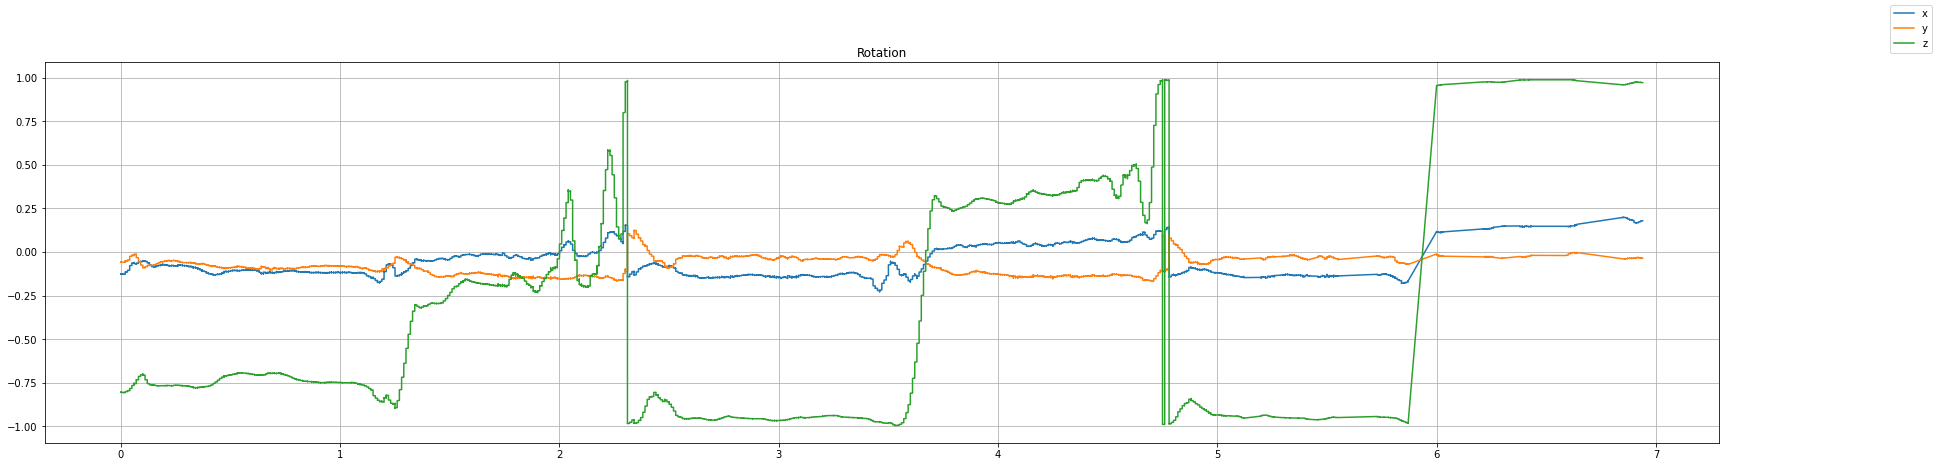

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

a=userot
fig = plt.figure(figsize=(30,7),)
plt.title("Rotation")
pd.set_option('display.float_format', '{:.3f}'.format)
plt.grid()
o=plt.plot(minutes,a.x, label="x")
o=plt.plot(minutes,a.y, label="y")
o=plt.plot(minutes,a.z, label="z")
o=fig.legend()

In [ ]:
#/*quaternation to euler in XYZ (seq:123)*/
#https://stackoverflow.com/questions/30279065/how-to-get-the-euler-angles-from-the-rotation-vector-sensor-type-rotation-vecto

import math
def quat2eulerxyz(q):
  #/*euler-angles*/
  psi = math.atan2( -2.0 * (q[2]*q[3] - q[0]*q[1]) , q[0]*q[0] - q[1]*q[1]- q[2]*q[2] + q[3]*q[3] )
  theta = math.asin( 2.0 * (q[1]*q[3] + q[0]*q[2]) )
  phi = math.atan2( 2.0 * (-q[1]*q[2] + q[0]*q[3]) , q[0]*q[0] + q[1]*q[1] - q[2]*q[2] - q[3]*q[3] )
  e=[q[0]]*4
  e[1] = psi
  e[2] = theta
  e[3] = phi
  return e


In [ ]:
rot=userot.to_numpy()
qseries=[]
for r in rot:
  q1 = r[5]
  q2 = r[6]
  q3 = r[7]
  q0 = r[8]
  if len(qseries) % (len(rot)/100)==0:
    # print (str(q0)  +"    vs    "+ str(math.sqrt(1-q1*q1-q2*q2-q3*q3)))
    pass

  qseries.append([q0,q1,q2,q3])

angles=[]
rotx=[]
roty=[]
rotz=[]
for q in qseries:
  e = quat2eulerxyz(q)
  angles.append(e)
  rotx.append(e[1])
  roty.append(e[2])
  rotz.append(e[3])

print(angles[0:5])
print(max(rotx))
print(min(rotx))
print(max(roty))
print(min(roty))
print(max(rotz))
print(min(rotz))

tmin=rot[0][0]
print(tmin)
times=[row[0]-tmin for row in rot]
minutes=[round(t/1000.0/1000.0/1000.0/60,3) for t in times]
print(minutes)


[[0.5779014, -0.24180074469126384, 0.13569242506144172, -1.8790839769387784], [0.5780088, -0.24182108621110024, 0.13547769904110363, -1.8788502886151421], [0.57788885, -0.24168617449824414, 0.13568131744413298, -1.8791348773220324], [0.5779733, -0.2416076131730036, 0.13552795068462964, -1.8789632838139465], [0.5777243, -0.24165449161890049, 0.13584650198981238, -1.8795209139858469]]
0.3776199533378485
-0.37910260760885606
0.4590298273136521
-0.3142596064200533
3.140653465113667
-3.1415372280213876
513289291823666
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.006, 0.006, 0.006, 0.00

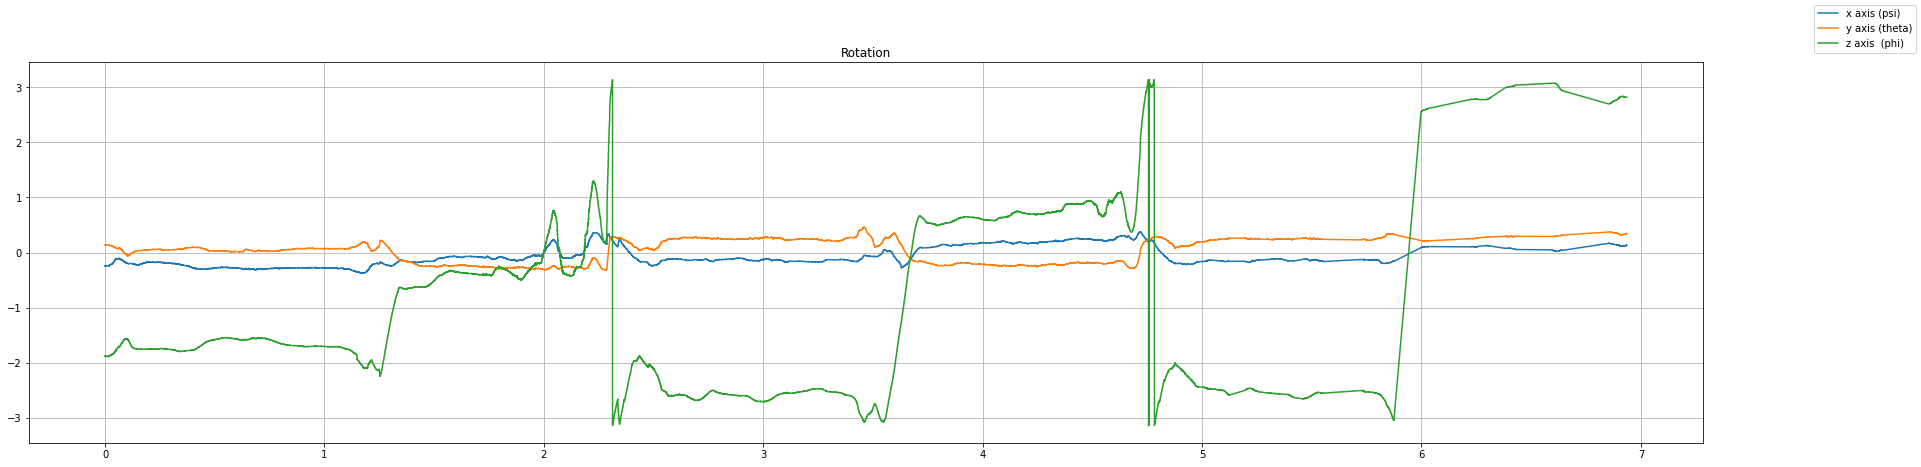

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math


fig = plt.figure(figsize=(30,7),)
plt.title("Rotation")

plt.grid()
o=plt.plot(minutes,rotx, label="x axis (psi)")
o=plt.plot(minutes, roty, label="y axis (theta)")
o=plt.plot(minutes,rotz, label="z axis  (phi)")
o=fig.legend()

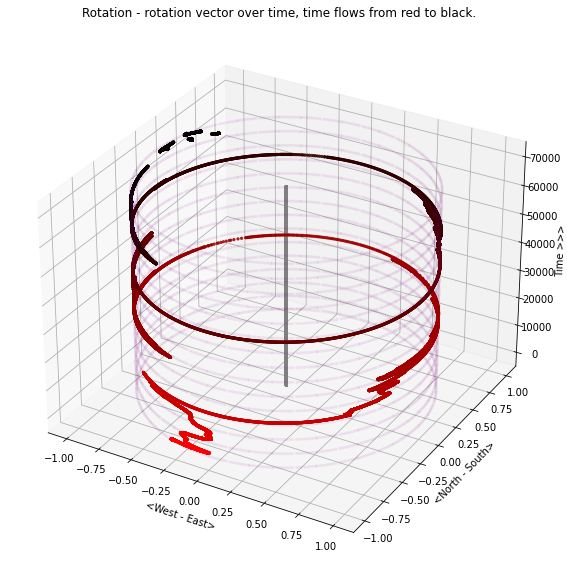

In [ ]:
useaxis=rotz

import matplotlib.pyplot as plt
import numpy as np
import math
import random

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.title("Rotation - rotation vector over time, time flows from red to black.")


r=userot.to_numpy()
ts=[row[0] for row in r]
xs=[math.cos(a) for a in useaxis]
ys=[math.sin(a) for a in useaxis]
zs=[len(xs)-i for i in range(0,len(xs))]

colors=['white']*len(xs)
for i in range(0,len(colors)):
  colors[i]=((len(colors)-i)/len(colors),0,0)
zeros=[0]*len(xs)
consttime=range(0,len(xs))

ax.scatter(xs, ys, consttime, marker='.', color=colors, alpha=0.8)

ax.scatter(zeros, zeros, zs, marker='.', color='gray', alpha=0.1)
circlex=[math.cos(x) for x in range(0,360)]
circley=[math.sin(y) for y in range(0,360)]
for i in range(0,len(colors),5000):
  ax.scatter(circlex, circley, i, marker='.', color='purple', alpha=0.05)


ax.set_xlabel('<West - East>')
ax.set_ylabel('<North - South>')
ax.set_zlabel('Time >>>')


plt.show()

0.999999900081558
-0.9999999984640032
-0.08713531791224541
0.9999992478559739
-0.9999999999554474
-0.32932351653604736


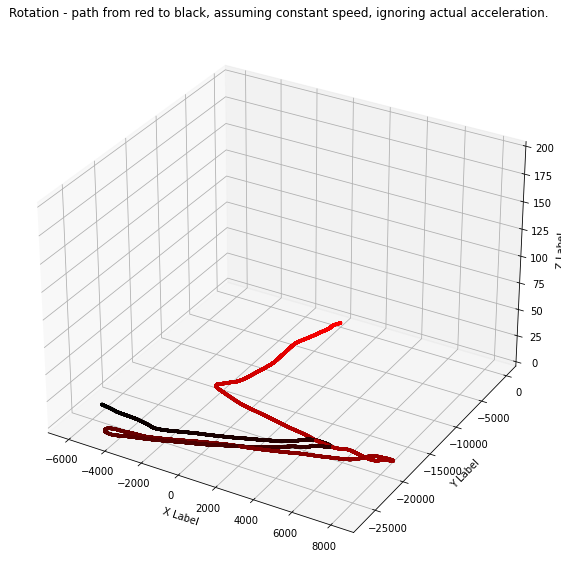

In [ ]:
useaxis=rotz

from statistics import mean

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.set_zlim(0,200)
plt.title("Rotation - path from red to black, assuming constant speed, ignoring actual acceleration.")


r=userot.to_numpy()
ts=[row[0] for row in r]
xs=[math.cos(a) for a in useaxis]
ys=[math.sin(a) for a in useaxis]
zs=[len(xs)-i for i in range(0,len(xs))]


xxs=[x for x in xs]
yys=list(ys)
zzs=list(zs)
for i in range(1,len(xxs)):
  xxs[i]=xxs[i-1]+xxs[i]
  yys[i]=yys[i-1]+yys[i]

#zzs=range(0,len(zzs)
zeros=[0.0]*len(xxs)
colors=['yellow']*len(zzs)
for i in range(0,len(colors)):
  colors[i]=((len(colors)-i)/len(colors),0,0)

ax.scatter(xxs, yys, zeros, marker='.', color=colors, alpha=0.5)

print(max(xs))
print(min(xs))
print(mean(xs))
print(max(ys))
print(min(ys))
print(mean(ys))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

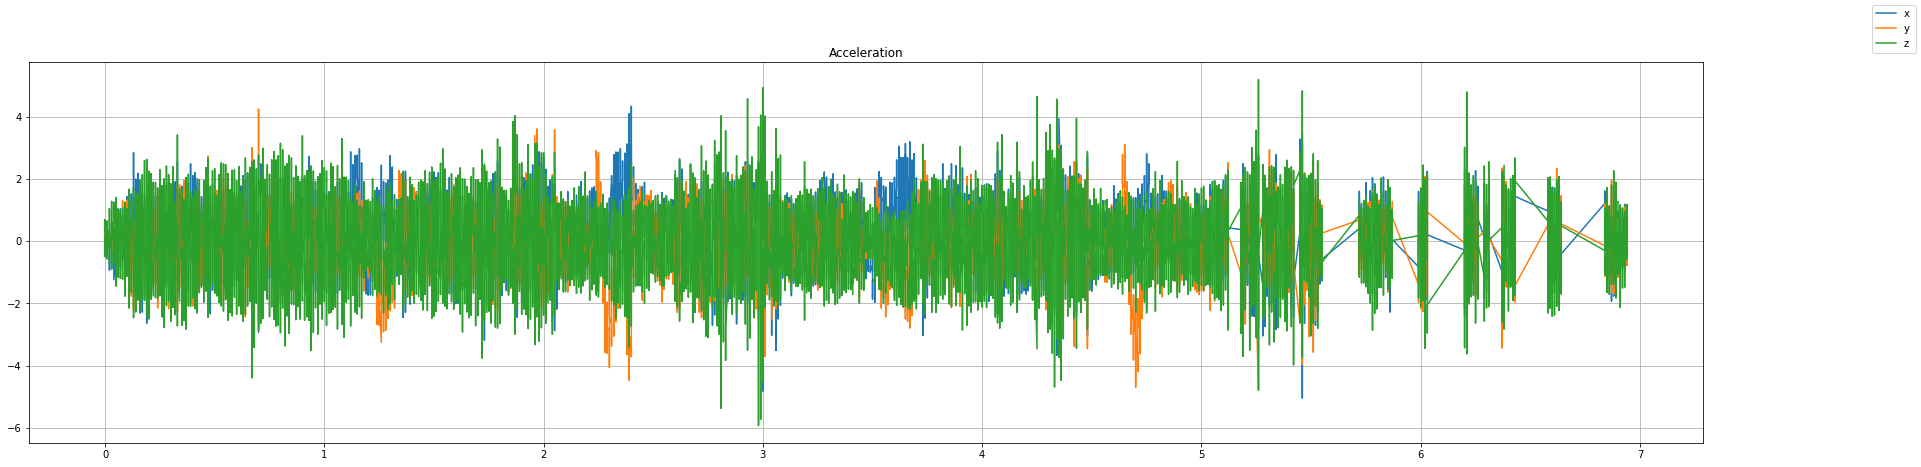

In [ ]:
a=useacc

import matplotlib.pyplot as plt
import numpy as np
import math


fig = plt.figure(figsize=(30,7),)
plt.title("Acceleration")

plt.grid()
o=plt.plot(accminutes,a["x"], label="x")
o=plt.plot(accminutes, a["y"], label="y")
o=plt.plot(accminutes,a["z"], label="z ")
o=fig.legend()

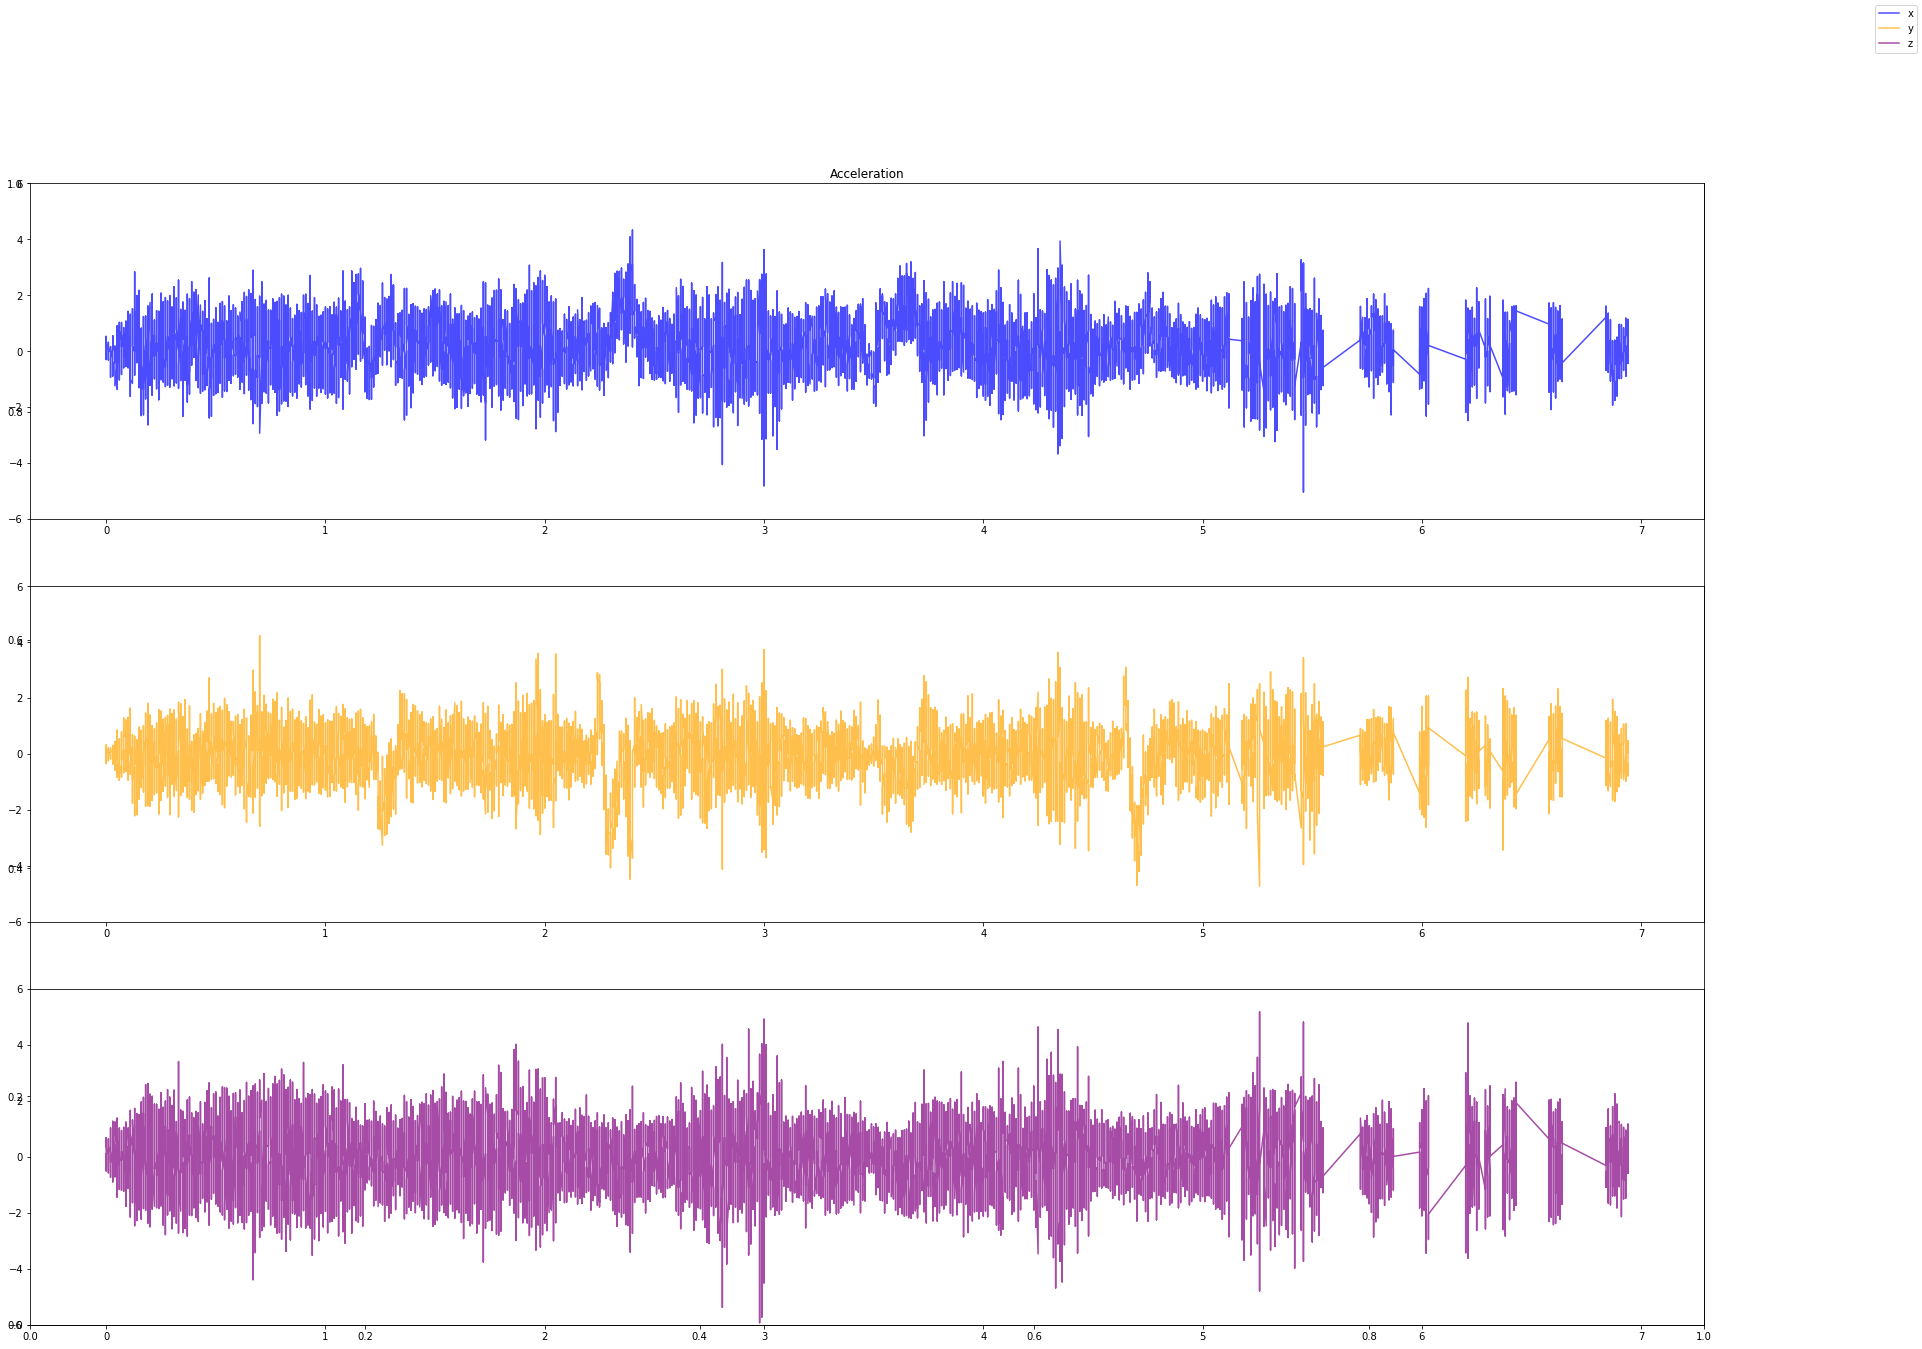

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

a=useacc
fig = plt.figure(figsize=(30,21))
plt.title("Acceleration")

axs=fig.subplots(3,1)
for ax in axs:
  ax.set_ylim(-6,6)

o=axs[0].plot(accminutes,a.x, label="x", alpha=0.7, color='blue')
o=axs[1].plot(accminutes,a.y, label="y", alpha=0.7, color='orange')
o=axs[2].plot(accminutes,a.z, label="z", alpha=0.7, color='purple')
o=fig.legend()

71660
71660
[-0.16407776, -0.032746553, -0.086746454, -0.23539138, 0.13906145, 0.43150425, 0.38452268, 0.16896462, 0.20979714, 0.16441059, 0.06350374, -0.2853744, -0.07268691, 0.36277032, 0.38582373, 0.25190473, 0.26597953, 0.15443897, -0.020839214, -0.11704564]
[[1.0, 0.0, 0.0], [0.9999860452135082, 0.0, 0.0], [0.9999720904270165, 0.0, 0.0], [0.9999581356405247, 0.0, 0.0], [0.9999441808540329, 0.0, 0.0], [0.9999302260675411, 0.0, 0.0], [0.9999162712810494, 0.0, 0.0], [0.9999023164945576, 0.0, 0.0], [0.9998883617080658, 0.0, 0.0], [0.9998744069215741, 0.0, 0.0], [0.9998604521350823, 0.0, 0.0], [0.9998464973485905, 0.0, 0.0], [0.9998325425620987, 0.0, 0.0], [0.9998185877756071, 0.0, 0.0], [0.9998046329891153, 0.0, 0.0], [0.9997906782026235, 0.0, 0.0], [0.9997767234161318, 0.0, 0.0], [0.99976276862964, 0.0, 0.0], [0.9997488138431482, 0.0, 0.0], [0.9997348590566565, 0.0, 0.0]]


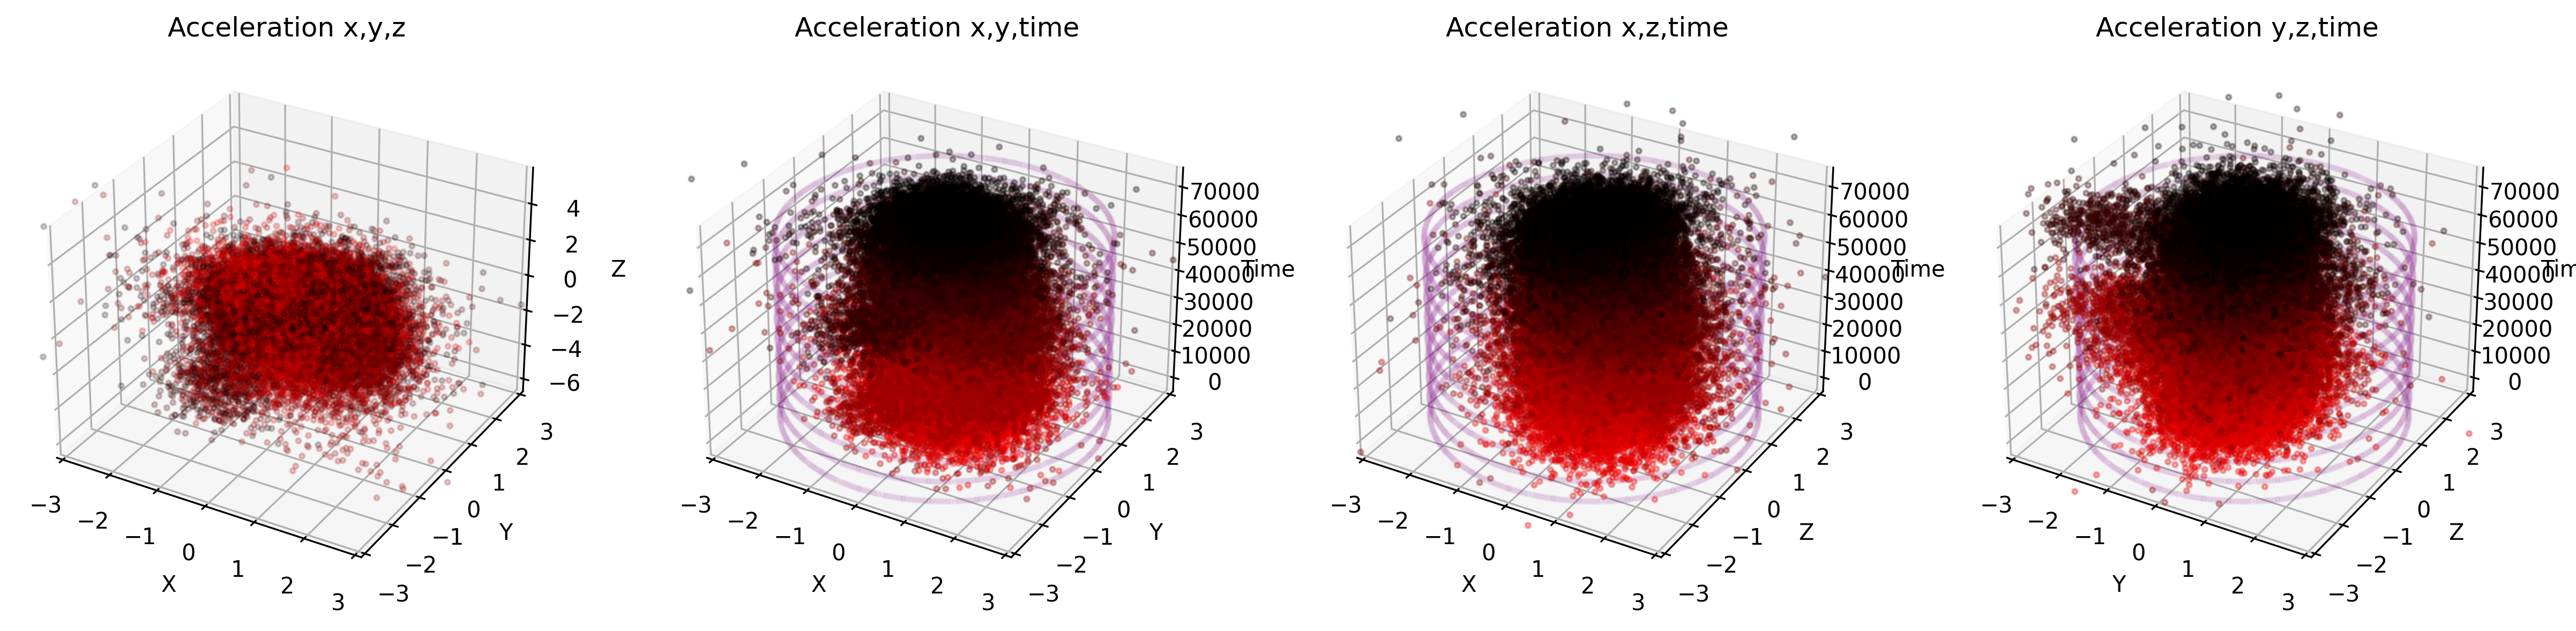

In [ ]:
from pandas.core.internals.construction import range_to_ndarray
useaxis=useacc["x"]
useaxis2=useacc["y"]
useaxis3=useacc["z"]


import matplotlib.pyplot as plt
import numpy as np
import math
import random

fig = plt.figure(figsize=(20,40),dpi=300)
#ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-5,5)
#ax.set_ylim(-5,5)
#axs=fig.subplots(1,4,projection='3d')
#for ax in axs:



xs=[a for a in useaxis]
ys=[a for a in useaxis2]
zs=[a for a in useaxis3]
pole=[len(xs)-i for i in range(0,len(xs))]

colors=['white']*(len(xs))
for i in range(0,len(colors)):
  colors[i]=list(((len(colors)-i)/len(colors),0.0,0.0))
zeros=[0]*len(xs)
consttime=range(0,len(xs))
circlex=[3*math.cos(x) for x in range(0,360)]
circley=[3*math.sin(y) for y in range(0,360)]

#ax.scatter(xs, ys, consttime, marker='.', color=colors, alpha=0.2)
axs=[]
for i in range(0,4):
  ax = fig.add_subplot(1, 4, i+1, projection='3d')
  ax.set_xlim(-3,3)
  ax.set_ylim(-3,3)
  axs.append(ax)
print(len(xs))
print(len(colors))
print(xs[0:20])
print(colors[0:20])
axs[0].scatter(xs,ys,zs, alpha=0.2, color=colors, marker='.')
axs[1].scatter(xs,ys,consttime, alpha=0.3, color=colors, marker='.')
axs[2].scatter(xs,zs,consttime, alpha=0.3, color=colors, marker='.')
axs[3].scatter(ys,zs,consttime, alpha=0.3, color=colors, marker='.')

for i in range(1,4):
  axs[i].scatter(zeros*2, zeros*2, pole*2, marker='.', color='gray', alpha=0.1)
  num_circles=10
  for z in range(0,num_circles):
    axs[i].scatter(circlex, circley, [z/num_circles*consttime[-1]]*360, marker='.', color='purple', alpha=0.05)

axs[0].set_title("Acceleration x,y,z")
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_zlabel('Z')
axs[1].set_title("Acceleration x,y,time")
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Time')
axs[2].set_title("Acceleration x,z,time")
axs[2].set_xlabel('X')
axs[2].set_ylabel('Z')
axs[2].set_zlabel('Time')
axs[3].set_title("Acceleration y,z,time")
axs[3].set_xlabel('Y')
axs[3].set_ylabel('Z')
axs[3].set_zlabel('Time')

plt.show()

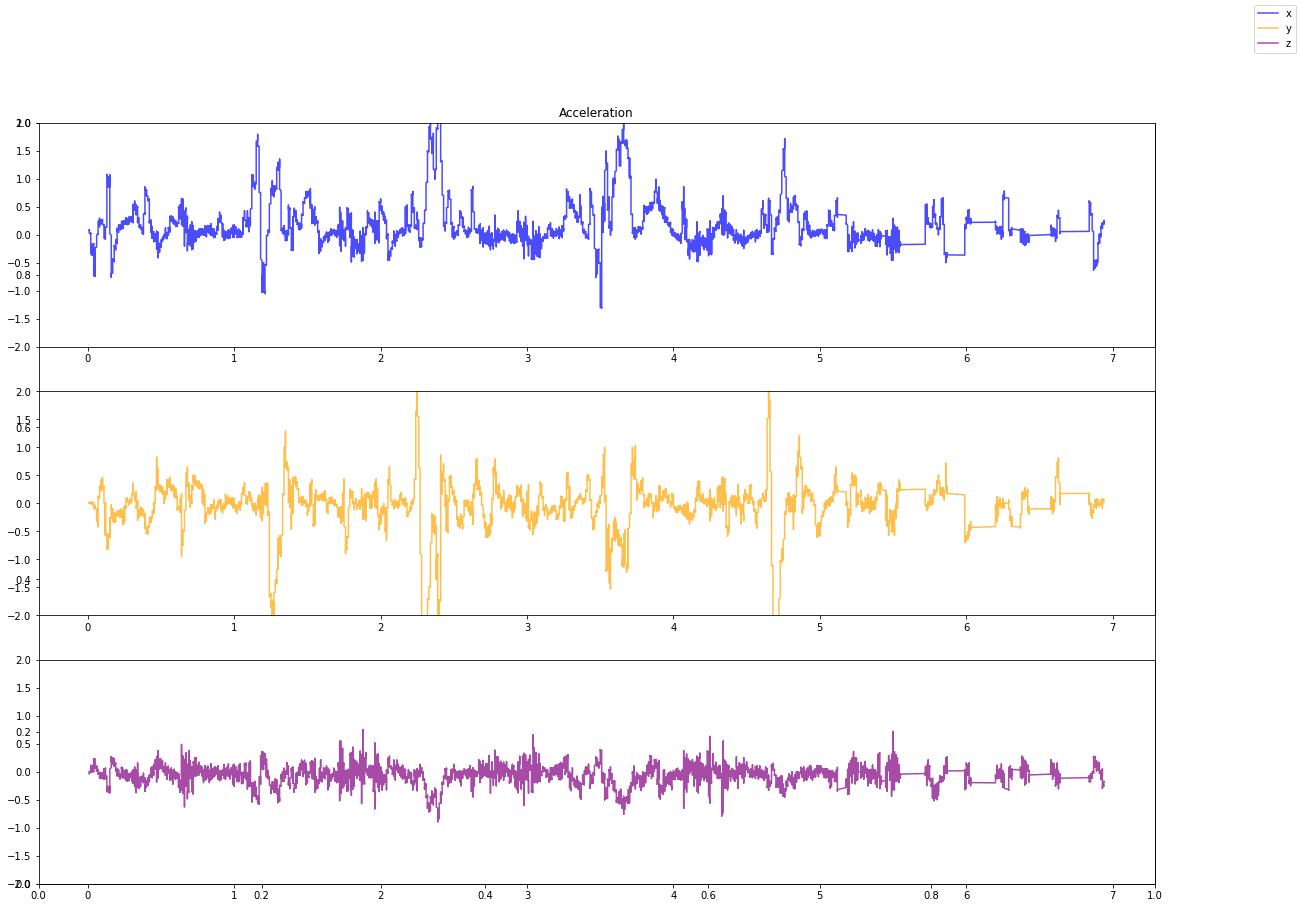

In [ ]:
a=useacc

#print(alldata.timestamp.max())
#print(alldata.timestamp.min())
#print(alldata.timestamp.size)

mx = alldata.timestamp.max()
mi = alldata.timestamp.min()
num = alldata.timestamp.size
points_in_100ms = int(num/((mx-mi)/1000.0/1000.0/100.0))
points_in_1s = int(num/((mx-mi)/1000.0/1000.0/1000.0))
#print("window size")
#print(points_in_100ms)
window_size=points_in_100ms
window_size=points_in_1s


smoothx=a.x.rolling(points_in_100ms).mean()
smoothy=a.y.rolling(points_in_100ms).mean()
smoothz=a.z.rolling(points_in_100ms).mean()
smootht=a.timestamp.tail(a.size-window_size)
fig = plt.figure(figsize=(20,14))
plt.title("Acceleration")

x=smoothx
y=smoothy
z=smoothz
ts=smootht

axs=fig.subplots(3,1)
for ax in axs:
  ax.set_ylim(-2,2)
#print(smoothx.array)
o=axs[0].plot(accminutes,x, label="x", alpha=0.7, color='blue')
o=axs[1].plot(accminutes,y, label="y", alpha=0.7, color='orange')
o=axs[2].plot(accminutes,z, label="z", alpha=0.7, color='purple')
o=fig.legend()

71660
71586
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[[1.0, 0.0, 0.0], [0.999986030788143, 0.0, 0.0], [0.9999720615762858, 0.0, 0.0], [0.9999580923644288, 0.0, 0.0], [0.9999441231525718, 0.0, 0.0], [0.9999301539407147, 0.0, 0.0], [0.9999161847288576, 0.0, 0.0], [0.9999022155170005, 0.0, 0.0], [0.9998882463051435, 0.0, 0.0], [0.9998742770932864, 0.0, 0.0], [0.9998603078814293, 0.0, 0.0], [0.9998463386695723, 0.0, 0.0], [0.9998323694577151, 0.0, 0.0], [0.9998184002458581, 0.0, 0.0], [0.9998044310340011, 0.0, 0.0], [0.999790461822144, 0.0, 0.0], [0.9997764926102869, 0.0, 0.0], [0.9997625233984299, 0.0, 0.0], [0.9997485541865728, 0.0, 0.0], [0.9997345849747157, 0.0, 0.0]]


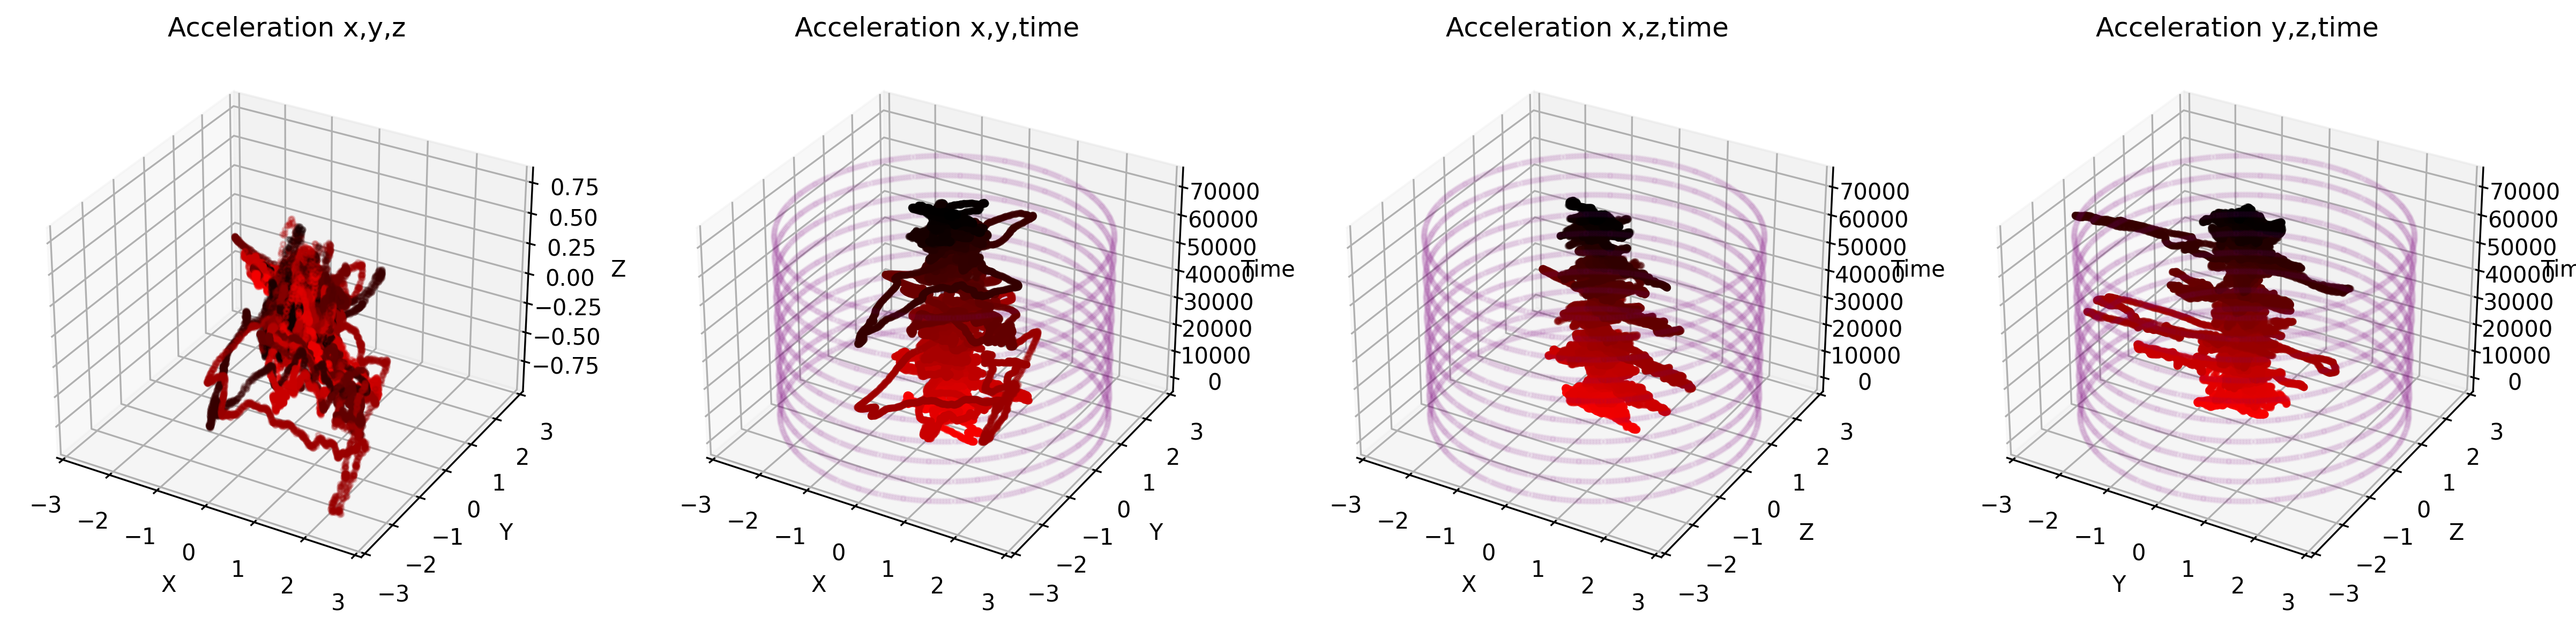

In [ ]:
from pandas.core.internals.construction import range_to_ndarray
useaxis=useacc["x"]
useaxis2=useacc["y"]
useaxis3=useacc["z"]
useaxis=smoothx
useaxis2=smoothy
useaxis3=smoothz

import matplotlib.pyplot as plt
import numpy as np
import math
import random

fig = plt.figure(figsize=(20,40),dpi=300)
#ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-5,5)
#ax.set_ylim(-5,5)
#axs=fig.subplots(1,4,projection='3d')
#for ax in axs:



xs=[a for a in useaxis]
ys=[a for a in useaxis2]
zs=[a for a in useaxis3]
pole=[len(xs)-i for i in range(0,len(xs))]

colors=['white']*(len(xs)-74)
for i in range(0,len(colors)):
  colors[i]=list(((len(colors)-i)/len(colors),0.0,0.0))
zeros=[0]*len(xs)
consttime=range(0,len(xs))
circlex=[3*math.cos(x) for x in range(0,360)]
circley=[3*math.sin(y) for y in range(0,360)]

#ax.scatter(xs, ys, consttime, marker='.', color=colors, alpha=0.2)
axs=[]
for i in range(0,4):
  ax = fig.add_subplot(1, 4, i+1, projection='3d')
  ax.set_xlim(-3,3)
  ax.set_ylim(-3,3)
  axs.append(ax)
print(len(xs))
print(len(colors))
print(xs[0:20])
print(colors[0:20])
axs[0].scatter(xs,ys,zs, alpha=0.2, color=colors, marker='.')
axs[1].scatter(xs,ys,consttime, alpha=0.3, color=colors, marker='.')
axs[2].scatter(xs,zs,consttime, alpha=0.3, color=colors, marker='.')
axs[3].scatter(ys,zs,consttime, alpha=0.3, color=colors, marker='.')

for i in range(1,4):
  axs[i].scatter(zeros*2, zeros*2, pole*2, marker='.', color='gray', alpha=0.1)
  num_circles=10
  for z in range(0,num_circles):
    axs[i].scatter(circlex, circley, [z/num_circles*consttime[-1]]*360, marker='.', color='purple', alpha=0.05)

axs[0].set_title("Acceleration x,y,z")
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_zlabel('Z')
axs[1].set_title("Acceleration x,y,time")
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Time')
axs[2].set_title("Acceleration x,z,time")
axs[2].set_xlabel('X')
axs[2].set_ylabel('Z')
axs[2].set_zlabel('Time')
axs[3].set_title("Acceleration y,z,time")
axs[3].set_xlabel('Y')
axs[3].set_ylabel('Z')
axs[3].set_zlabel('Time')

plt.show()

In [ ]:
import math
def rotate_x(yzangle,x,y,z):
  xaxis=[x,
         y*math.cos(yzangle) - z * math.sin(yzangle),
         y*math.sin(yzangle) + z * math.cos(yzangle)]
  return xaxis

def rotate_y(xzangle,x,y,z):
  yaxis=[x * math.cos(xzangle) + z * math.sin(xzangle),
         y,
         -x * math.sin(xzangle) + z * math.cos(xzangle)]
  return yaxis

def rotate_xy(yzangle,xzangle,x,y,z):
  x,y,z = rotate_x(yzangle,x,y,z)
  x,y,z = rotate_y(xzangle,x,y,z)
  return x,y,z


70901
[-0.10643285127039634, -0.10693300506853919, -0.10743509807235226, -0.10793918787022813, -0.10844550585251814, -0.10895361329696834, -0.10946324217173688, -0.10997455025593206, -0.11048784760776693, -0.11100322197300451, -0.11152019038413855, -0.11203857454989859, -0.11255869987293617, -0.11308055294409619, -0.11360385476201233, -0.11412842302121476, -0.11465411158085287, -0.11518116888129282, -0.11570959326280952, -0.11623898544647714, -0.116769298378474, -0.1173008730693105, -0.11783362095873011, -0.1183673773672347, -0.11890165845008457, -0.11943672404202839, -0.11997262574801545, -0.12050896625866021, -0.12104571011125258, -0.1215827805844896, -0.12212026227057723, -0.12265803476287745, -0.12319624346915845, -0.12373495415713459, -0.12427407215495997, -0.1248133371046197, -0.12535274472903232, -0.1258924278792058, -0.12643244724316946, -0.12697235729923914, -0.12751210113928493, -0.12805200117831042, -0.12859190259477615, -0.12913112237563582, -0.1296695204461145, -0.13020753

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1062: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


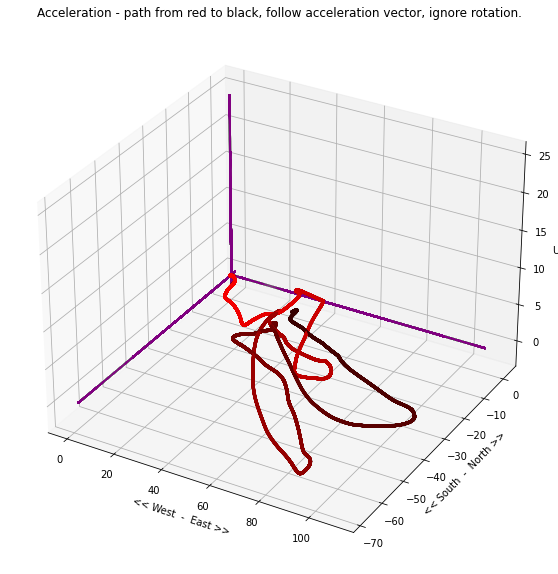

In [ ]:
#NotebookApp.iopub_data_rate_limit=5000000.0

import time

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#ax.set_zlim(0,200)
plt.title("Acceleration - path from red to black, follow acceleration vector, ignore rotation.")

ts=[row for row in smootht]
xs=[row for row in smoothx]
ys=[row for row in smoothy]
zs=[row for row in smoothz]
ts=ts[window_size:-1]
xs=xs[window_size:-1]
ys=ys[window_size:-1]
zs=zs[window_size:-1]

xzangle=0.2866991586860137
yzangle=0.45732963470206117
xyplane=[rotate_xy(-yzangle,-xzangle,x,y,z) for x,y,z in zip(xs,ys,zs)]
xs =[x for x,y,z in xyplane]
ys =[y for x,y,z in xyplane]
zs =[z for x,y,z in xyplane]
#print(a)
#print(ts)
#print(xs)

#from statistics import mean
#print(max(xs))
#print(min(xs))
#print(mean(xs))
#print(max(ys))
#print(min(ys))
#print(mean(ys))
#tdiffs=[ts[0]]*len(ts)
#for i in range(1,len(tdiffs)):
  #3tdiffs[i]=ts[i]-tdiffs[i-1]
  #print(max(tdiffs)/1000.0/1000.0/1000.0)
#print(min(tdiffs))
#print(mean(tdiffs)/1000.0/1000.0/1000.0)

ts=range(1,len(ts)*4988334,4988334)
N2S=1/1000.0/1000.0/1000.0
#N2S=1
reset_every=99999999999
vdecay=0.99969

xmean=mean(xs)
ymean=mean(ys)
zmean=mean(zs)
print(len(ts))

#VELOCITY
vxs=[x for x in xs]
vys=[y for y in ys]
vzs=[z for z in zs]
for i in range(1,len(vxs)):
  vxs[i-1]
  vxs[i]
  ts[i-1]
  ts[i]
  vxs[i]=vdecay*vxs[i-1]+vxs[i]*(ts[i]-ts[i-1])*N2S
  if i%reset_every==0:
    vxs[i]=0.0

for i in range(1,len(vxs)):
  vys[i]=vdecay*vys[i-1]+vys[i]*(ts[i]-ts[i-1])*N2S
  if i%reset_every==0:
    vys[i]=0.0

for i in range(1,len(xxs)):
  vzs[i]=vdecay*vzs[i-1]+vzs[i]*(ts[i]-ts[i-1])*N2S
  if i%reset_every==0:
    vzs[i]=0.0

#POSITION
xxs=[x for x in vxs]
yys=[y for y in vys]
zzs=[z for z in vzs]

for i in range(1,len(xxs)):
  xxs[i]=vdecay*xxs[i-1]+xxs[i]*(ts[i]-ts[i-1])*N2S

for i in range(1,len(vxs)):
  yys[i]=vdecay*yys[i-1]+yys[i]*(ts[i]-ts[i-1])*N2S

for i in range(1,len(xxs)):
  zzs[i]=vdecay*zzs[i-1]+zzs[i]*(ts[i]-ts[i-1])*N2S

zeros=[0.0]*len(xxs)
colors=['yellow']*len(xxs)
for i in range(0,len(colors)):
  colors[i]=((len(colors)-i)/len(colors),0,0)
  if i%reset_every==0:
    colors[i]='yellow'
print(xxs[0:100])
print(yys[0:100])
print(zzs[0:100])

ax.scatter(xxs[0:-15000], yys[0:-15000], zeros[0:-15000], marker='.', color=colors[0:-15000], alpha=0.5)
ax.scatter([0.0]*(len(zzs)-15000), [0.0]*(len(zzs)-15000), zzs[:-15000], color='purple', marker='.', alpha=0.005)
ax.scatter(xxs[:-15000], [0.0]*(len(zzs)-15000), [0.0]*(len(zzs)-15000), color='purple', marker='.', alpha=0.005)
ax.scatter([0.0]*(len(zzs)-15000), yys[:-15000], [0.0]*(len(zzs)-15000), color='purple', marker='.', alpha=0.005)

ax.set_xlabel('<< West  -  East >>')
ax.set_ylabel('<< South  -  North >>')
ax.set_zlabel('Up?')
#ax.set_zlim(0,200)



plt.show()

[-0.10643285127039634, -0.10693300506853919, -0.10743509807235226, -0.10793918787022813, -0.10844550585251814, -0.10895361329696834, -0.10946324217173688, -0.10997455025593206, -0.11048784760776693, -0.11100322197300451, -0.11152019038413855, -0.11203857454989859, -0.11255869987293617, -0.11308055294409619, -0.11360385476201233, -0.11412842302121476, -0.11465411158085287, -0.11518116888129282, -0.11570959326280952, -0.11623898544647714, -0.116769298378474, -0.1173008730693105, -0.11783362095873011, -0.1183673773672347, -0.11890165845008457, -0.11943672404202839, -0.11997262574801545, -0.12050896625866021, -0.12104571011125258, -0.1215827805844896, -0.12212026227057723, -0.12265803476287745, -0.12319624346915845, -0.12373495415713459, -0.12427407215495997, -0.1248133371046197, -0.12535274472903232, -0.1258924278792058, -0.12643244724316946, -0.12697235729923914, -0.12751210113928493, -0.12805200117831042, -0.12859190259477615, -0.12913112237563582, -0.1296695204461145, -0.13020753557949

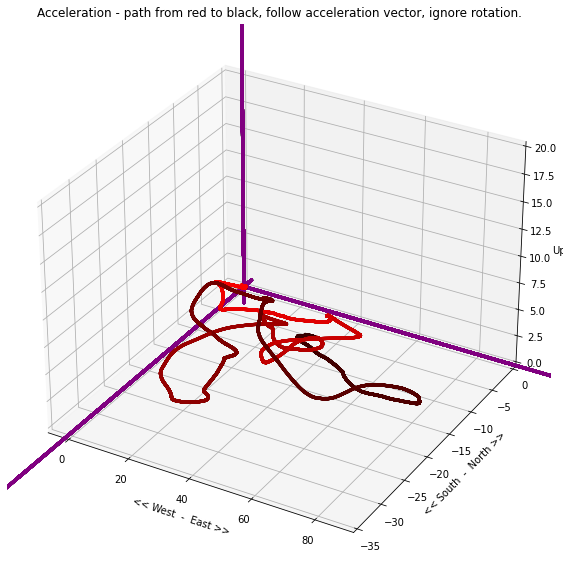

In [ ]:
#a=useacc.to_numpy()
#NotebookApp.iopub_data_rate_limit=5000000.0



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#ax.set_zlim(0,200)
#
print(xxs[0:100])
print(yys[0:100])
print(zzs[0:100])
ax.scatter(xxs[:-15000], yys[:-15000], zzs[:-15000], marker='.', color=colors[:-15000], alpha=0.5)
#ax.scatter(zeros[0:100000], zeros[0:100000], zzs[0:100000], marker='.', color='purple', alpha=0.1)
#num_circles=10
#circlex=[4*(10^20)*math.cos(x) for x in range(0,360)]
#circley=[4*(10^20)*math.sin(y) for y in range(0,360)]

#for z in range(0,num_circles):
#  ax.scatter(circlex, circley, [z/num_circles*zzs[int(z*len(zzs)/(num_circles))]]*360, marker='.', color='blue', alpha=0.5)
ax.scatter([0.0]*(len(zzs)-15000), [0.0]*(len(zzs)-15000), zzs[:-15000], color='purple', marker='.', alpha=1.0)
ax.scatter(xxs[:-15000], [0.0]*(len(zzs)-15000), [0.0]*(len(zzs)-15000), color='purple', marker='.', alpha=1.0)
ax.scatter([0.0]*(len(zzs)-15000), yys[:-15000], [0.0]*(len(zzs)-15000), color='purple', marker='.', alpha=1.0)

ax.set_xlabel('<< West  -  East >>')
ax.set_ylabel('<< South  -  North >>')
ax.set_zlabel('Up?')
ax.set_xlim(-5,90)
ax.set_ylim(-35,0)
ax.set_zlim(0,20)

plt.title("Acceleration - path from red to black, follow acceleration vector, ignore rotation.")

plt.show()

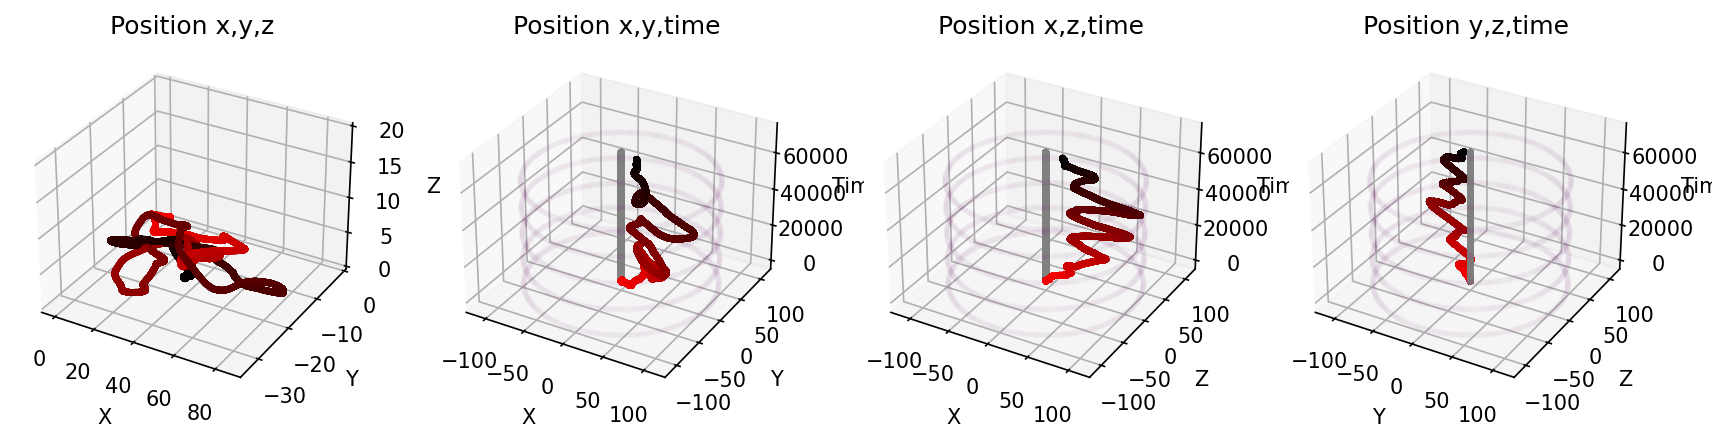

In [ ]:

useaxis=xxs
useaxis2=yys
useaxis3=zzs

import matplotlib.pyplot as plt
import numpy as np
import math
import random

fig = plt.figure(figsize=(14,21),dpi=150)




xxx=[a for a in useaxis]
yyy=[a for a in useaxis2]
zzz=[a for a in useaxis3]
pole=[len(xxx)-i for i in range(0,len(xxx))]

colors=['white']*(len(xxx))
for i in range(0,len(colors)):
  colors[i]=list(((len(colors)-i)/len(colors),0.0,0.0))
zeros=[0]*len(xxx)
consttime=range(0,len(xxx))


radius=math.sqrt(max(xxx)*max(xxx)+max(yyy)*max(yyy))
circlex=[radius*math.cos(x) for x in range(0,360)]
circley=[radius*math.sin(y) for y in range(0,360)]

axs=[]
for i in range(0,4):
  ax = fig.add_subplot(1, 4, i+1, projection='3d')
  axs.append(ax)

axs[0].scatter(xxx,yyy,zzz, alpha=0.2, color=colors, marker='.')
axs[1].scatter(xxx,yyy,consttime, alpha=0.3, color=colors, marker='.')
axs[2].scatter(xxx,zzz,consttime, alpha=0.3, color=colors, marker='.')
axs[3].scatter(yyy,zzz,consttime, alpha=0.3, color=colors, marker='.')

for i in range(1,4):
  axs[i].scatter(zeros, zeros, pole, marker='.', color='gray', alpha=0.1)
  num_circles=5
  for z in range(0,num_circles):
    axs[i].scatter(circlex, circley, [z/num_circles*consttime[-1]]*360, marker='.', color='purple', alpha=0.01)
axs[0].set_xlim(-5,90)
axs[0].set_ylim(-35,0)
axs[0].set_zlim(0,20)

axs[0].set_title("Position x,y,z")
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_zlabel('Z')
axs[1].set_title("Position x,y,time")
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_zlabel('Time')
axs[2].set_title("Position x,z,time")
axs[2].set_xlabel('X')
axs[2].set_ylabel('Z')
axs[2].set_zlabel('Time')
axs[3].set_title("Position y,z,time")
axs[3].set_xlabel('Y')
axs[3].set_ylabel('Z')
axs[3].set_zlabel('Time')

plt.show()

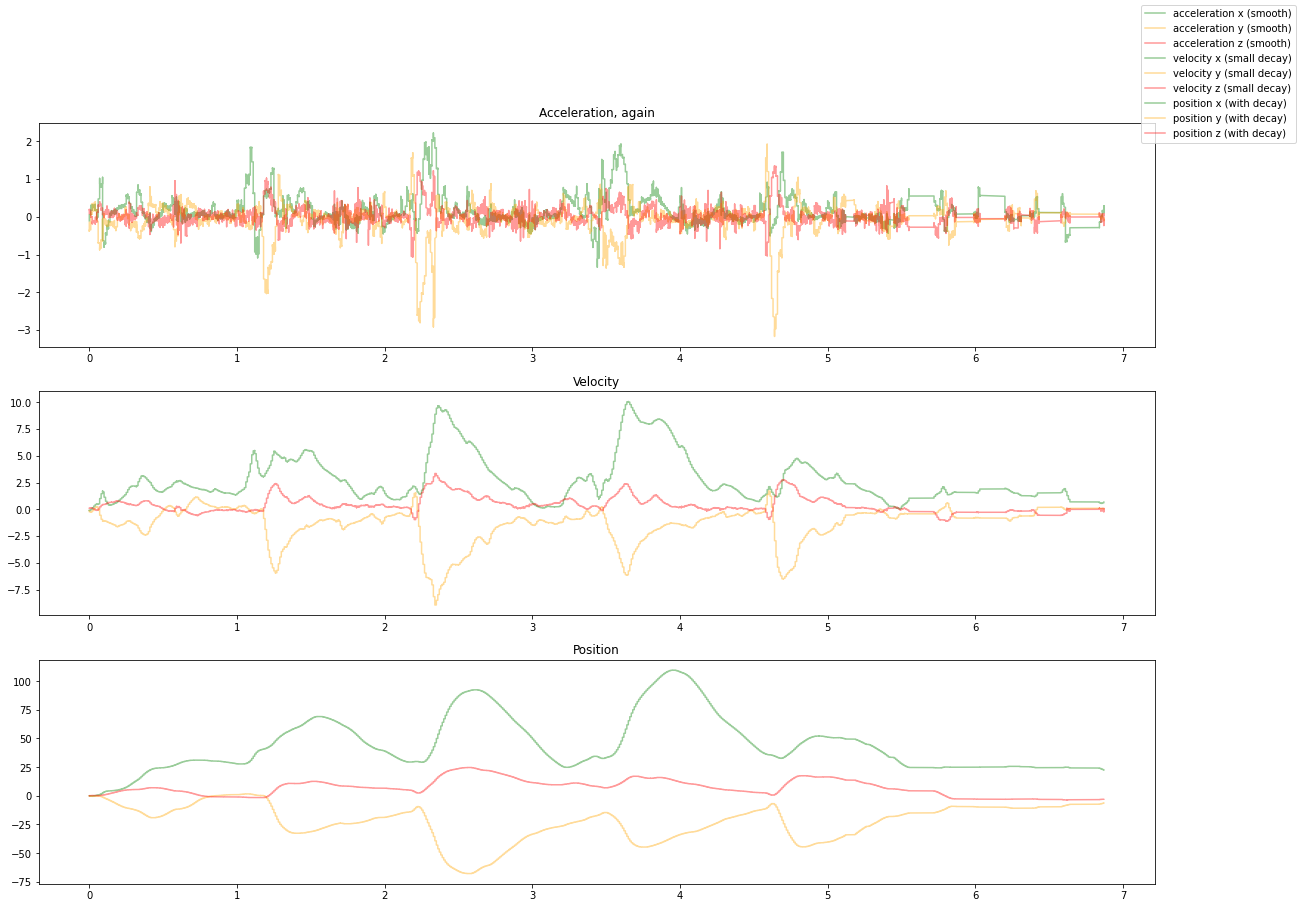

In [ ]:
fig = plt.figure(figsize=(20,14))
axs=fig.subplots(3,1)


x=accminutes[0:len(xxs)]
o=axs[0].plot(x,xs, label="acceleration x (smooth)", alpha=0.4, color='green')
o=axs[0].plot(x,ys, label="acceleration y (smooth)", alpha=0.4, color='orange')
o=axs[0].plot(x,zs, label="acceleration z (smooth)", alpha=0.4, color='red')
o=axs[1].plot(x,vxs, label="velocity x (small decay)", alpha=0.4, color='green')
o=axs[1].plot(x,vys, label="velocity y (small decay)", alpha=0.4, color='orange')
o=axs[1].plot(x,vzs, label="velocity z (small decay)", alpha=0.4, color='red')
o=axs[2].plot(x,xxs, label="position x (with decay)", alpha=0.4, color='green')
o=axs[2].plot(x,yys, label="position y (with decay)", alpha=0.4, color='orange')
o=axs[2].plot(x,zzs, label="position z (with decay)", alpha=0.4, color='red')
axs[0].set_title("Acceleration, again")
axs[1].set_title("Velocity")
axs[2].set_title("Position")
o=fig.legend()
plt.show()

0.0
4988263.643672163
4988334
range(1, 353677868934, 4988334)
[0.0, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 4988334, 49883

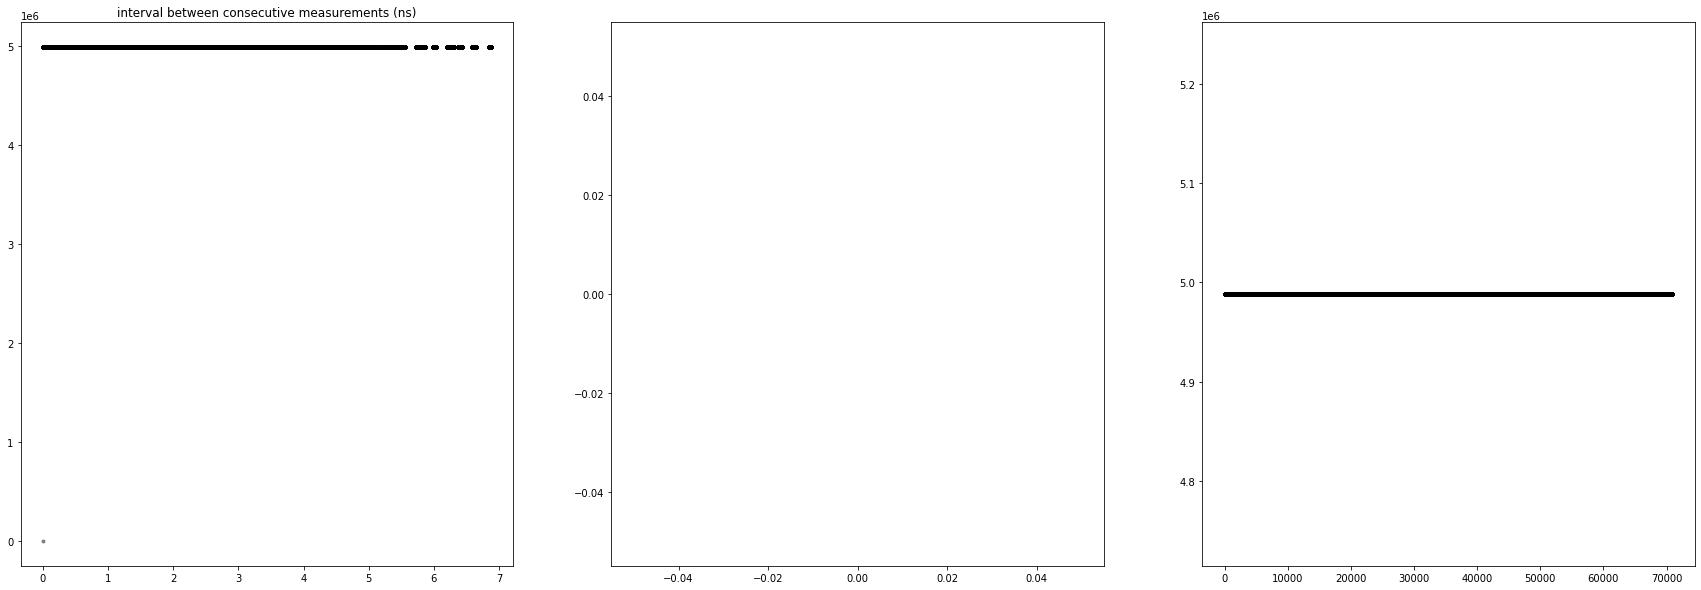

In [ ]:
timediffs = [0.0]*len(ts)
small=[]
big=[]
for i in range(1, len(timediffs)):
  timediffs[i]=ts[i]-ts[i-1]
m=mean(timediffs)
print(min(timediffs))
print(m)
print(max(timediffs))
for i in range(1, len(timediffs)):
  d = timediffs[i]
  if d > m:
    big.append([i,d])
  else:
    small.append([i,d])

print(ts)
print(timediffs)

fig = plt.figure(figsize=(30,10))
axs=fig.subplots(1,3)

print(len(small))
print(len(big))
x=accminutes[0:len(timediffs)]
o=axs[0].scatter(x,timediffs, alpha=0.4, color='black', marker='.')
o=axs[1].scatter([t for t,d in small],[d for t,d in small], alpha=0.4, color='black', marker='.')
o=axs[2].scatter([t for t,d in big],[d for t,d in big], alpha=0.4, color='black', marker='.')
axs[0].set_title("interval between consecutive measurements (ns)")
plt.show()

In [ ]:
import pandas as pd
print(len(timediffs))
foo = pd.DataFrame({'timestamp':ts,
                    'timediffs':timediffs,
                    'x':acceleration.x.to_numpy()[-len(timediffs):],
                    'y':acceleration.y.to_numpy()[-len(timediffs):],
                    'vy':vys})
foo.abs().nlargest(20,'vy').head(5)


70901


timestamp   timediffs     x     y    vy
28205  140695960471 4988334.000 0.176 0.109 8.942
28204  140690972137 4988334.000 0.261 0.148 8.942
28206  140700948805 4988334.000 0.459 0.137 8.941
28207  140705937139 4988334.000 0.630 0.445 8.941
28203  140685983803 4988334.000 0.525 0.156 8.941

In [ ]:
alldata.loc[alldata["timestamp"]<=513661293232119].loc[alldata["type"]==10].tail(10)

timestamp  type                          sensortype    vendor  \
309334  513651087075348    10  android.sensor.linear_acceleration  qualcomm   
309341  513651092063681    10  android.sensor.linear_acceleration  qualcomm   
309343  513651097052014    10  android.sensor.linear_acceleration  qualcomm   
309349  513651102040348    10  android.sensor.linear_acceleration  qualcomm   
309352  513651107028681    10  android.sensor.linear_acceleration  qualcomm   
309358  513651112017014    10  android.sensor.linear_acceleration  qualcomm   
309362  513651117005348    10  android.sensor.linear_acceleration  qualcomm   
309368  513651121993681    10  android.sensor.linear_acceleration  qualcomm   
310452  513661288243785    10  android.sensor.linear_acceleration  qualcomm   
310453  513661293232119    10  android.sensor.linear_acceleration  qualcomm   

        version      x      y      z  zz  str1  str2  str3  str4  str5  str6  
309334        1 -0.304 -0.304 -0.062 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309341        1 -0.338 -0.243 -2.951 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309343        1 -0.094 -1.639  0.567 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309349        1  0.356  0.119  0.916 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309352        1  0.824  0.074  1.219 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309358        1 -0.190  0.216 -2.186 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309362        1 -0.489 -0.840 -1.283 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
309368        1  0.203  0.937 -2.044 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
310452        1 -0.290 -0.065 -0.303 NaN   NaN   NaN   NaN   NaN   NaN   NaN  
310453        1 -0.304  0.370  0.744 NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
513661293232119-513661288243785

4988334

In [ ]:
513651107028681-513651112017014

-4988333

In [ ]:

v=[min(xxs[:-15000]),max(xxs[:-15000]),min(yys[:-15000]),max(yys[:-15000]),min(zzs[:-15000]),max(zzs[:-15000])]
pratio=[(v[1]-v[0])/(v[5]-v[4]),(v[3]-v[2])/(v[5]-v[4]),(v[1]-v[0])/(v[3]-v[2])]
pratio

[4.173205782547916, 2.644446217031639, 1.5781019692025697]

In [ ]:
v=[min(xs[:-15000]),max(xs[:-15000]),min(ys[:-15000]),max(ys[:-15000]),min(zs[:-15000]),max(zs[:-15000])]
aratio=[(v[1]-v[0])/(v[5]-v[4]),(v[3]-v[2])/(v[5]-v[4]),(v[1]-v[0])/(v[3]-v[2])]
aratio

[1.4691395279361892, 2.103112636661972, 0.6985548478601626]

In [ ]:
v=[min(vxs[:-15000]),max(vxs[:-15000]),min(vys[:-15000]),max(vys[:-15000]),min(vzs[:-15000]),max(vzs[:-15000])]
vratio=[(v[1]-v[0])/(v[5]-v[4]),(v[3]-v[2])/(v[5]-v[4]),(v[1]-v[0])/(v[3]-v[2])]
vratio

[2.3625518356059994, 2.4667711303787634, 0.9577507238149161]

In [ ]:
import math

v=[min(xxs),max(xxs),min(yys),max(yys),min(zzs),max(zzs)]
pratio=[(v[1]-v[0])/(v[5]-v[4]),(v[3]-v[2])/(v[5]-v[4]),(v[1]-v[0])/(v[3]-v[2])]
xzangle=math.atan(1/pratio[0])
yzangle=math.atan(1/pratio[1])
print(xzangle,yzangle)
deg= (180*xzangle*/math.pi,yzangle*math.pi)
deg


0.253013629015462 0.3874056192273612


(143.07583647115237, 1.2170706473240827)

[0.36357874835512455, 0.3651912346552776, 0.3668098818246408, 0.3684343661312957, 0.37006510166898354, 0.3717018710667338, 0.3733443317782422, 0.3749925564112911, 0.37664629207497174, 0.37830588281451566, 0.3799714729604287, 0.3816427420818573, 0.3833190254238203, 0.38500007483160054, 0.3866861073879796, 0.3883770558650068, 0.390072918022241, 0.3917739247162055, 0.3934796548890958, 0.3951900355020049, 0.396905473078177, 0.39862524418021733, 0.40034932832332387, 0.40207821304045566, 0.40381158222067826, 0.4055491668938777, 0.40729081915261006, 0.4090364914398633, 0.410786580282319, 0.4125409679892479, 0.4142995665976341, 0.41606242860585074, 0.4178289651176505, 0.41959912497312546, 0.42137311008052436, 0.42315068846137766, 0.4249317096109217, 0.4267164528083274, 0.42850506400427074, 0.43029755509132883, 0.4320940542865273, 0.4338948974197827, 0.43570006539910666, 0.4375092295786069, 0.4393226302755413, 0.44114031354215455, 0.4429619122045406, 0.4447874532269127, 0.44661638388123265, 0.4

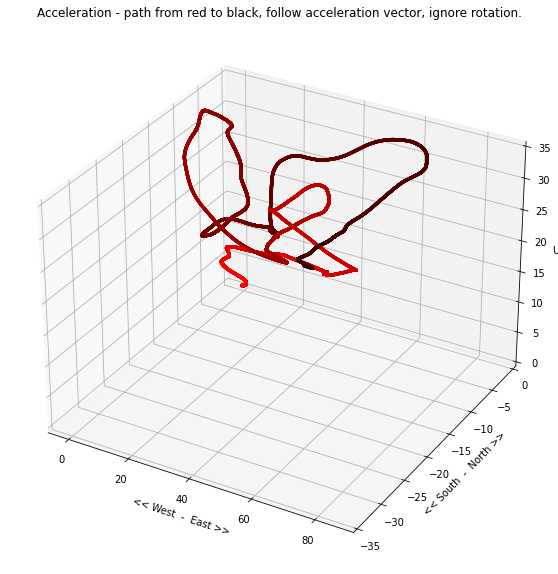

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#ax.set_zlim(0,200)
#

print(zzs[1000:1100])
#xyplane=[rotate_xy(-yzangle,-xzangle,x,y,z) for x,y,z in zip(xxs,yys,zzs)]
x =[x for x,y,z in xyplane]
y =[y for x,y,z in xyplane]
z =[z for x,y,z in xyplane]
x[0]=x[1]
y[0]=y[1]
z[0]=z[1]
print(z[1000:1100])
ax.scatter(x[:-15000], y[:-15000], z[:-15000], marker='.', color=colors[:-15000], alpha=0.5)


#ax.scatter([0.0]*(len(z)-15000), [0.0]*(len(z)-15000), z[:-15000], color='purple', marker='.', alpha=1.0)
#ax.scatter(x[:-15000], [0.0]*(len(z)-15000), [0.0]*(len(z)-15000), color='purple', marker='.', alpha=0.005)
#ax.scatter([0.0]*(len(z)-15000), y[:-15000], [0.0]*(len(z)-15000), color='purple', marker='.', alpha=0.005)


#radius=math.sqrt(max(x)*max(x)+max(y)*max(y))/2
#circlex=[radius*math.cos(x) for x in range(0,360)]
#circley=[radius*math.sin(y) for y in range(0,360)]

#ax.scatter(zeros[:-15000], zeros[:-15000], z[:-15000], marker='.', color='gray', alpha=0.1)
#num_circles=20
#for i in range(0,len(z[:-15000]),int(len(z[:-15000])/num_circles)):
#  ax.scatter(circlex, circley, [z[i]]*360, marker='.', color='gray', alpha=0.01)



print(min(z[:-15000]))
print(z.index(min(z[:-15000])))
ax.set_xlim(-5,90)
ax.set_ylim(-35,0)
ax.set_zlim(0,35)
ax.set_xlabel('<< West  -  East >>')
ax.set_ylabel('<< South  -  North >>')
ax.set_zlabel('Up?')
plt.title("Acceleration - path from red to black, follow acceleration vector, ignore rotation.")

plt.show()

In [ ]:
foo = pd.DataFrame({'timestamp':ts[:-15000],
                    'timediffs':timediffs[:-15000],
                    'x':x[:-15000],
                    'y':y[:-15000],
                    'z':z[:-15000]})
foo.nsmallest(1000,'y').tail(20)
#foo.size


timestamp   timediffs      x       y      z
30360  151445820241 4988334.000 74.412 -52.832 68.549
31341  156339375895 4988334.000 77.516 -52.829 69.376
30359  151440831907 4988334.000 74.406 -52.829 68.544
30358  151435843573 4988334.000 74.401 -52.827 68.540
31342  156344364229 4988334.000 77.518 -52.825 69.373
30357  151430855239 4988334.000 74.395 -52.824 68.536
30356  151425866905 4988334.000 74.389 -52.822 68.532
31343  156349352563 4988334.000 77.520 -52.821 69.369
30355  151420878571 4988334.000 74.384 -52.819 68.528
31344  156354340897 4988334.000 77.522 -52.818 69.365
30354  151415890237 4988334.000 74.378 -52.817 68.523
30353  151410901903 4988334.000 74.372 -52.814 68.519
31345  156359329231 4988334.000 77.524 -52.814 69.362
30352  151405913569 4988334.000 74.366 -52.812 68.515
31346  156364317565 4988334.000 77.526 -52.810 69.358
30351  151400925235 4988334.000 74.361 -52.809 68.511
30350  151395936901 4988334.000 74.355 -52.807 68.506
31347  156369305899 4988334.000 77.528 -52.806 69.354
30349  151390948567 4988334.000 74.349 -52.804 68.502
31348  156374294233 4988334.000 77.530 -52.802 69.350

In [ ]:
foo.min()

timestamp     1.000
timediffs     0.000
x            -0.249
y           -53.520
z             0.103
dtype: float64

In [ ]:
foo.max()

timestamp   278847870601.000
timediffs        4988334.000
x                     99.603
y                      1.029
z                     69.950
dtype: float64

In [ ]:
 	18024918558230700032.000 -	5341578792662261760.000

1.2683339765568438e+19

In [ ]:
116505575375405039616/1000/1000/1000/1000-120691060900348837888/1000/1000/1000/1000/1000

116505575375405039616
120691060900348837888
120691060900348837888
470899235253
2878015921825
4209319118861
69038677631617220608
470899235253

470899235253

In [ ]:
120691060900348837888.000 /pow(10,18)


120.69106090034884

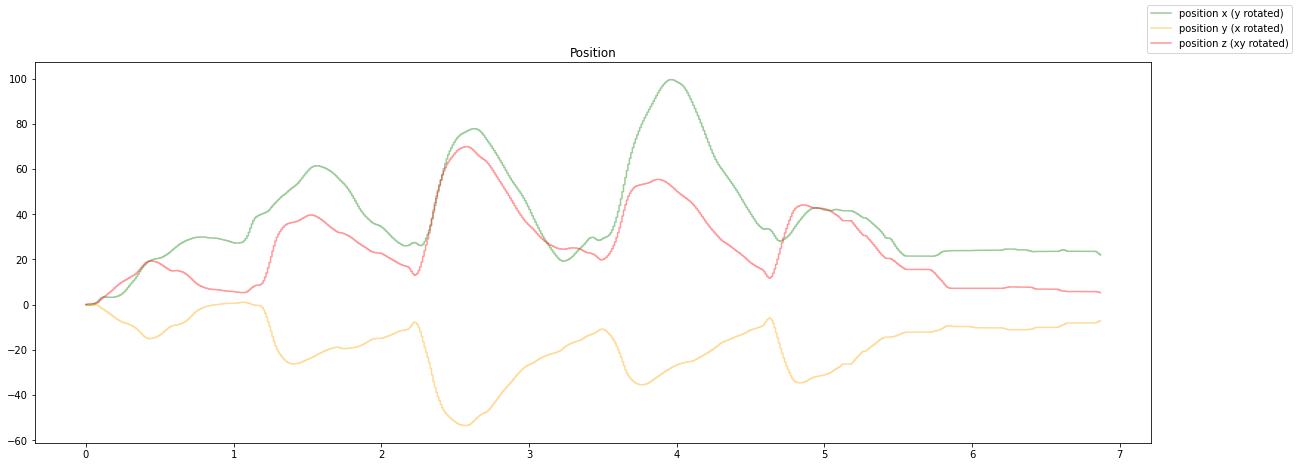

(-0.2492562212939323, -53.519953435733555, 0.10346311873774529)

In [ ]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot()


t=accminutes[0:len(xxs)]
o=ax.plot(t,x, label="position x (y rotated)", alpha=0.4, color='green')
o=ax.plot(t,y, label="position y (x rotated)", alpha=0.4, color='orange')
o=ax.plot(t,z, label="position z (xy rotated)", alpha=0.4, color='red')
ax.set_title("Position")
o=fig.legend()
plt.show()
min(x),min(y),min(z)

In [ ]:
xzangle, yzangle

(0.253013629015462, 0.3874056192273612)

In [ ]:
v=[min(x[:-15000]),max(x[:-15000]),min(y[:-15000]),max(y[:-15000]),min(z[:-15000]),max(z[:-15000])]
[(v[1]-v[0])/(v[5]-v[4]),(v[3]-v[2])/(v[5]-v[4]),(v[1]-v[0])/(v[3]-v[2])]

[1.4296007212019994, 0.780984700982407, 1.83051053292554]

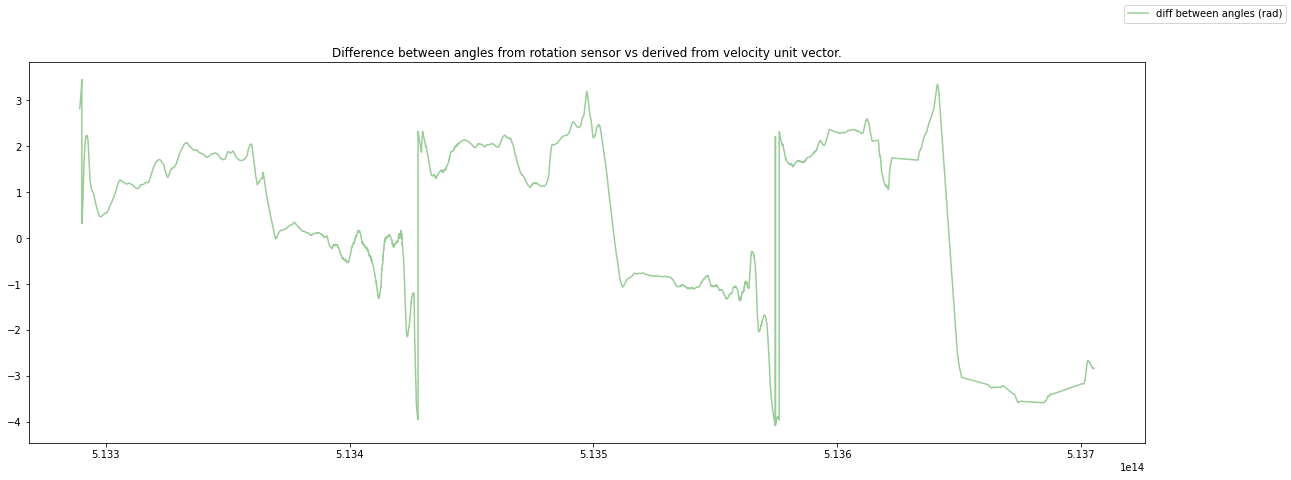

(-0.2492562212939323, -53.519953435733555, 0.10346311873774529)

In [ ]:
# Now let's combine those!

from statistics import mean

# TODO: Should I also tilt rotation coordinates with xzangle and yzangle?
# I guess we'll learn soon...

# Rotation
rotangles=rotz
r=userot.to_numpy()
xs=[math.cos(a) for a in rotangles]
ys=[math.sin(a) for a in rotangles]


# Velocity
vxs
vys
vzs

length = min(len(rotangles), len(vxs),len(r))

# Time
ts=[row[0] for row in r]


# What is the difference between rotz angles and direction vectors.
diffangles=[]
for i in range(0, min(len(rotangles),len(vxs))):
  vx = vxs[i]
  vy = vys[i]
  vangle = math.atan(vy/vx)
  diffangles.append(vangle-rotangles[i])

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot()


o=ax.plot(ts,diffangles, label="diff between angles (rad)", alpha=0.4, color='green')
ax.set_title("Difference between angles from rotation sensor vs derived from velocity unit vector.")
o=fig.legend()
plt.show()
min(x),min(y),min(z)



0.999999900081558
-0.9999999984640032
-0.08713531791224541
0.9999992478559739
-0.9999999999554474
-0.32932351653604736


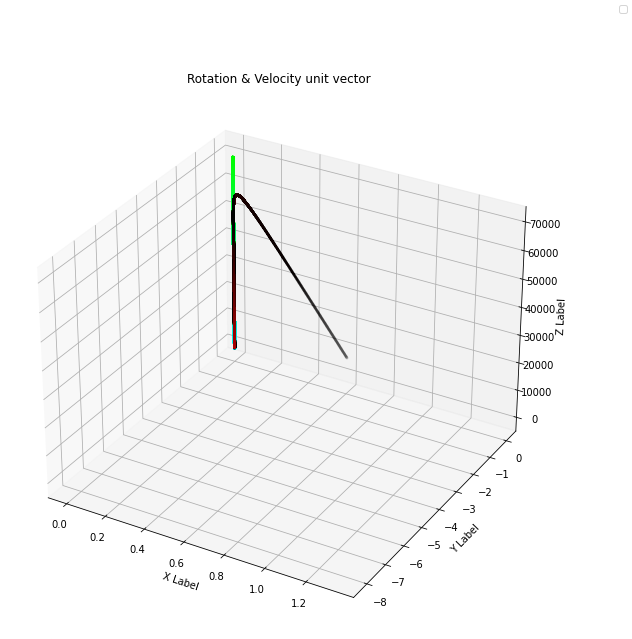

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#ax.set_zlim(0,200)
#ax.set_xlim(0,1)
#ax.set_ylim(-10,10)
plt.title("Rotation & Velocity unit vector")



for i in range(1,length):
  xxs[i]=xxs[i-1]+xxs[i]
  yys[i]=yys[i-1]+yys[i]
  #vmagn[i] = math.sqrt(vxs[i]*vxs[i]+vys[i]*vys[i])

#zzs=range(0,len(zzs)
zeros=[0.0]*length
consttime=[i for i in range(0,length)]
colors=['red']*length
for i in range(0,length):
  colors[i]=((len(colors)-i)/len(colors),0,0)

ax.scatter(xxs[0:length], yys[0:length], consttime, marker='.', color=colors, alpha=0.01)

colors=['blue']*length
for i in range(0,length):
  colors[i]=(0,1,(len(colors)-i)/len(colors))
ax.scatter(xs[0:length],ys[0:length], consttime, marker='.', color=colors, alpha=0.5)

#ax.scatter(zeros,zeros, consttime, marker='.', color='blue', alpha=0.1)
ax.scatter(zeros,consttime, zeros, marker='.', color='blue', alpha=0.1)
ax.scatter(zeros,consttime, zeros, marker='.', color='blue', alpha=0.1)


print(max(xs))
print(min(xs))
print(mean(xs))
print(max(ys))
print(min(ys))
print(mean(ys))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.legend()

plt.show()

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
#ax.set_zlim(0,200)
plt.title("Path using Rotation & Velocity")



xxs=list(vxs)
yys=list(vys)
vmagn=[]*len(xxs)

for i in range(1,len(xxs)):
  xxs[i]=xxs[i-1]+xxs[i]
  yys[i]=yys[i-1]+yys[i]
  vmagn[i] = math.sqrt(vxs[i]*vxs[i]+vys[i]*vys[i])

#zzs=range(0,len(zzs)
zeros=[0.0]*len(xxs)
colors=['yellow']*len(zzs)
for i in range(0,len(colors)):
  colors[i]=((len(colors)-i)/len(colors),0,0)

ax.scatter(xxs, yys, zeros, marker='.', color=colors, alpha=0.5)

print(max(xs))
print(min(xs))
print(mean(xs))
print(max(ys))
print(min(ys))
print(mean(ys))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()